In [1]:
import networkx as nx
import json
from eodc_pg_parser.graph import OpenEOProcessGraph

from openeo.internal.process_graph_visitor import ProcessGraphVisitor, ProcessGraphUnflattener
from eodc_pg_parser.pg_schema import ProcessNode, ResultReference, PGEdgeType
import json

In [4]:
flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


Deserialised process graph into nested structure


Walking node root
Walking node mintime
Walking node min
Walking node evi
Walking node m3
Walking node div
Walking node sub
Walking node nir
Walking node red
Walking node sum
Walking node nir
Walking node m1
Walking node red
Walking node m2
Walking node blue
Walking node dc


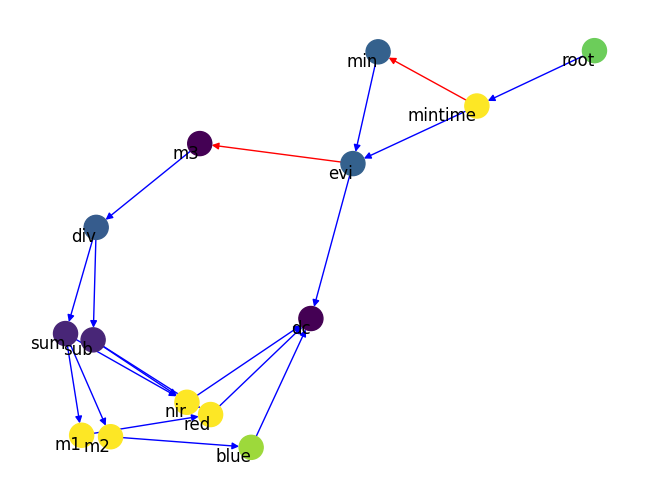

In [5]:
parsed_graph.plot()

In [6]:
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

{'root-e1b48075-0652-4c58-93b6-f5477e5de636': {'data': '__UNRESOLVED_RESULT_REFERENCE__',
  'format': 'GTiff'},
 'mintime-e1b48075-0652-4c58-93b6-f5477e5de636': {'data': '__UNRESOLVED_RESULT_REFERENCE__',
  'dimension': 't',
  'reducer': '__UNRESOLVED_CALLBACK__'},
 'evi-e1b48075-0652-4c58-93b6-f5477e5de636': {'data': '__UNRESOLVED_RESULT_REFERENCE__',
  'dimension': 'bands',
  'reducer': '__UNRESOLVED_CALLBACK__'},
 'min-974a72ac-8791-4db0-9354-686e795981f3': {'data': '__UNRESOLVED_RESULT_REFERENCE__'},
 'dc-e1b48075-0652-4c58-93b6-f5477e5de636': {'id': 'Sentinel-2',
  'spatial_extent': {'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2},
  'temporal_extent': ['2018-01-01', '2018-02-01'],
  'bands': ['B02', 'B04', 'B08']},
 'm3-28257973-d500-408c-9f1a-31ef7a9f9274': {'x': '2.5',
  'y': '__UNRESOLVED_RESULT_REFERENCE__'},
 'div-28257973-d500-408c-9f1a-31ef7a9f9274': {'x': '__UNRESOLVED_RESULT_REFERENCE__',
  'y': '__UNRESOLVED_RESULT_REFERENCE__'},
 'sub-28257973-d500-408c-9f1a-

In [64]:
for edge in parsed_graph.G.edges(data=True):
    print(edge)

('root-88161013-d449-4aaf-b315-bbd541e5e514', 'mintime-88161013-d449-4aaf-b315-bbd541e5e514', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_substitutions': [ArgSubstitution(arg_name='data', setter_func=functools.partial(<function OpenEOProcessGraph._resolve_result_reference.<locals>.<lambda> at 0x7fe02c2bf700>, unique_node_id='root-88161013-d449-4aaf-b315-bbd541e5e514', arg_name='data'))]})
('mintime-88161013-d449-4aaf-b315-bbd541e5e514', 'evi-88161013-d449-4aaf-b315-bbd541e5e514', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_substitutions': [ArgSubstitution(arg_name='data', setter_func=functools.partial(<function OpenEOProcessGraph._resolve_result_reference.<locals>.<lambda> at 0x7fe02c2bfd30>, unique_node_id='mintime-88161013-d449-4aaf-b315-bbd541e5e514', arg_name='data'))]})
('mintime-88161013-d449-4aaf-b315-bbd541e5e514', 'min-00f551e2-fdef-4b54-9c07-1bdf213cdd23', {'reference_type': <PGEdgeType.Callback: 'callback'>, 'arg_na

## Experiments

In [32]:
import inspect

for edge in parsed_graph.G.out_edges:
    print("----------------------------------------------")
    if parsed_graph.G.edges[edge]["reference_type"] == PGEdgeType.ResultReference:
        node_where_parameter_belongs_to = parsed_graph.G.nodes[edge[0]]

        for arg_sub in parsed_graph.G.edges[edge]["arg_substitutions"]:
            arg_sub.setter_func(new_value="please change")

print(parsed_graph.G.nodes(data=True))


----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
----------------------------------------------
[('root-874c17d6-7eac-4069-b4b7-9c092b8d7b31', {'resolved_kwargs': {'data': 'please change', 'format': 'GTiff'}, 'node_name': 'root'}), ('mintime-874c17d6-7eac-4069-b4b7-9c092b8d7b31', {'resolved_kwargs': {'data': 'please change', 'dimension': 't', 'reducer': '__MISSING__'}, 'node_name': 'minti

In [ ]:
{node: node_name for node, node_name in nx.get_node_attributes(parsed_graph.G, "node_name").items()}

In [36]:
import networkx as nx
G = nx.DiGraph()
G.add_edge("here", "there", reference_type="Callback")
G.add_edge("here", "there", reference_type="Callback", tryout="hello")
G.add_edge("here", "there", reference_type="Callback", tryout="hehe")

G.edges(data=True)

OutEdgeDataView([('here', 'there', {'reference_type': 'Callback', 'tryout': 'hehe'})])

In [38]:
for u, v, data in G.out_edges("here", data=True):
    print(type(u))
    print(v)
    if data["reference_type"] == "Callback":
        print(u)
        print(v)

<class 'str'>
there
here
there
